<a href="https://colab.research.google.com/github/silvererudite/PRESC/blob/master/dev/silvererudite_task2/PRESC_startuptask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
dataset=pd.read_csv("vehicles.csv")
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
COMPACTNESS                  846 non-null int64
CIRCULARITY                  846 non-null int64
DISTANCE_CIRCULARITY         846 non-null int64
RADIUS_RATIO                 846 non-null int64
PR.AXIS_ASPECT_RATIO         846 non-null int64
MAX.LENGTH_ASPECT_RATIO      846 non-null int64
SCATTER_RATIO                846 non-null int64
ELONGATEDNESS                846 non-null int64
PR.AXIS_RECTANGULARITY       846 non-null int64
MAX.LENGTH_RECTANGULARITY    846 non-null int64
SCALED_VARIANCE_MAJOR        846 non-null int64
SCALED_VARIANCE_MINOR        846 non-null int64
SCALED_RADIUS_OF_GYRATION    846 non-null int64
SKEWNESS_ABOUT_MAJOR         846 non-null int64
SKEWNESS_ABOUT_MINOR         846 non-null int64
KURTOSIS_ABOUT_MAJOR         846 non-null int64
KURTOSIS_ABOUT_MINOR         846 non-null int64
HOLLOWS_RATIO                846 non-null int64
Class                        84

In [54]:
dataset["Class"].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

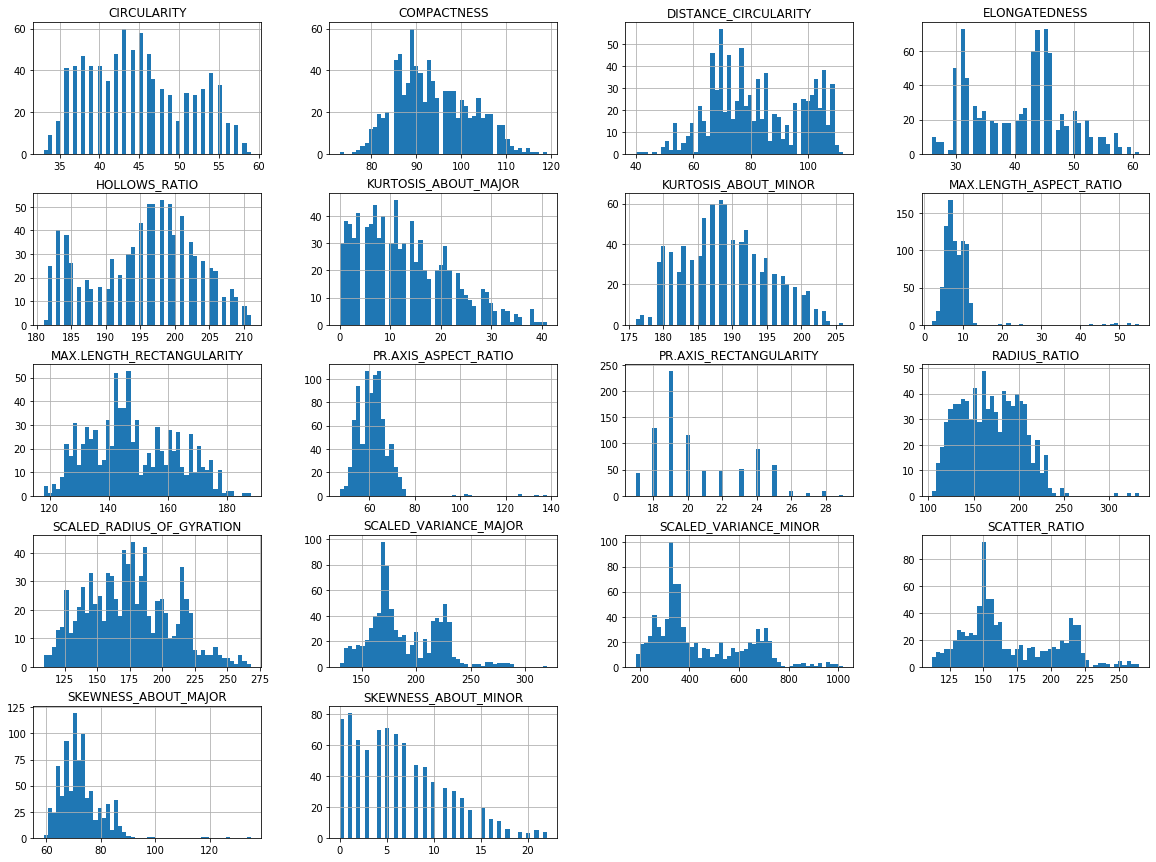

In [55]:

import matplotlib.pyplot as plt
import matplotlib as mp
mp.rcParams['figure.figsize']=(9,9)
dataset.hist(figsize=(20,15),bins=50)
plt.show()

In [56]:
dataset.skew(axis=0,skipna=True)

COMPACTNESS                  0.381271
CIRCULARITY                  0.262799
DISTANCE_CIRCULARITY         0.107221
RADIUS_RATIO                 0.390706
PR.AXIS_ASPECT_RATIO         3.821560
MAX.LENGTH_ASPECT_RATIO      6.778394
SCATTER_RATIO                0.605779
ELONGATEDNESS                0.047845
PR.AXIS_RECTANGULARITY       0.770684
MAX.LENGTH_RECTANGULARITY    0.256359
SCALED_VARIANCE_MAJOR        0.651814
SCALED_VARIANCE_MINOR        0.835837
SCALED_RADIUS_OF_GYRATION    0.280231
SKEWNESS_ABOUT_MAJOR         2.072583
SKEWNESS_ABOUT_MINOR         0.773792
KURTOSIS_ABOUT_MAJOR         0.689325
KURTOSIS_ABOUT_MINOR         0.248541
HOLLOWS_RATIO               -0.226341
dtype: float64

Feature slection and reduction , becuase not every feature affects the label

In [0]:
pearsoncorr=dataset.corr('pearson')


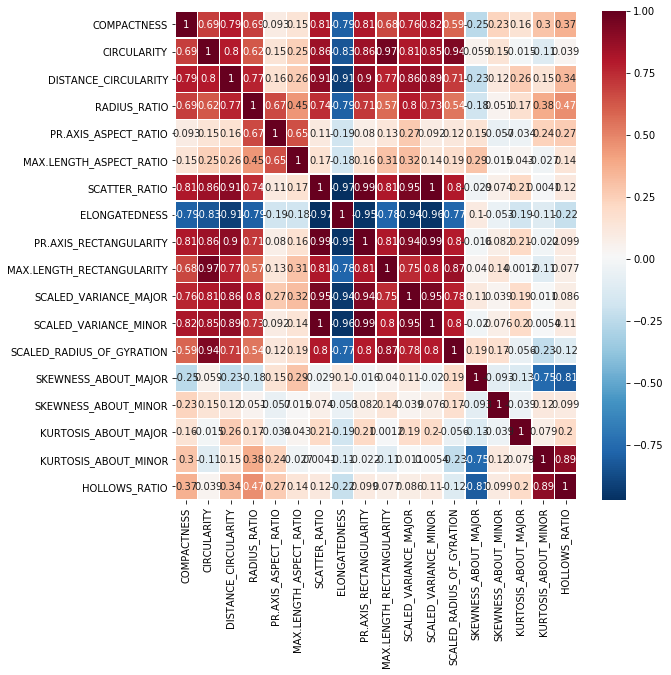

In [58]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [61]:
category_df=dataset.select_dtypes(include=['object','int'])
dummy_df=pd.get_dummies(category_df)
dummy_df['Class_bus','Class_saab','Class_opel','Class_van']=dataset['Class']
dummy_df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class_bus,Class_opel,Class_saab,Class_van,"(Class_bus, Class_saab, Class_opel, Class_van)"
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,0,0,0,1,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,0,0,0,1,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,0,0,1,0,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,0,0,0,1,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,1,0,0,0,bus


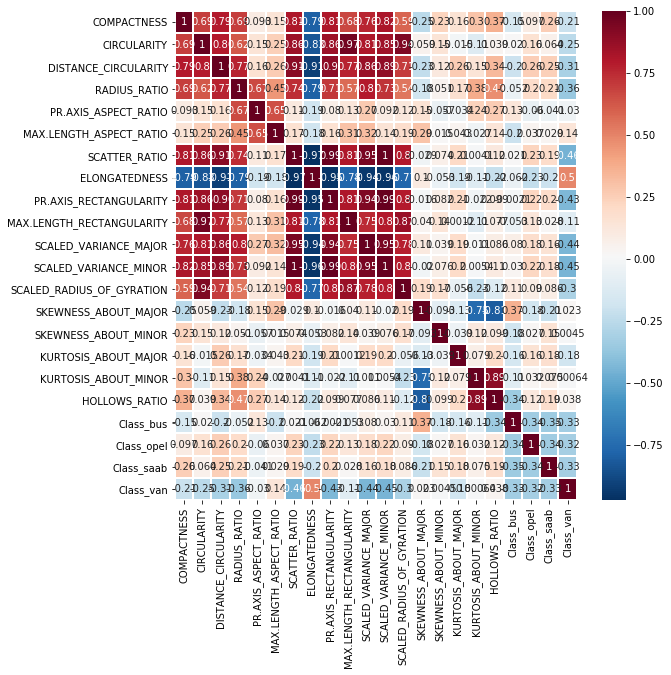

In [62]:
pearsoncorr2=dummy_df.corr('pearson')
sb.heatmap(pearsoncorr2, 
            xticklabels=pearsoncorr2.columns,
            yticklabels=pearsoncorr2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

So from abobe heatmaps the most correlated values to Class are skewness_about_major,pr.axis_rectangularity,scaled_variance_minor, elongatedness

*now making dataframe only with these features and splitting it to train and test datasets

In [68]:
labels=dataset['Class_bus','Class_saab','Class_opel','Class_van']
dataset=dataset.drop(['COMPACTNESS','CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO',  'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR' ,'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO'], axis=1)
dataset=pd.get_dummies(dataset)
dataset.corr().abs()


KeyError: ignored